In [1]:
##  importing Libraries

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
####fetching dataset
mnist = fetch_openml('mnist_784')

C:\Users\ashut\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
### plotting and checking arrays

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0


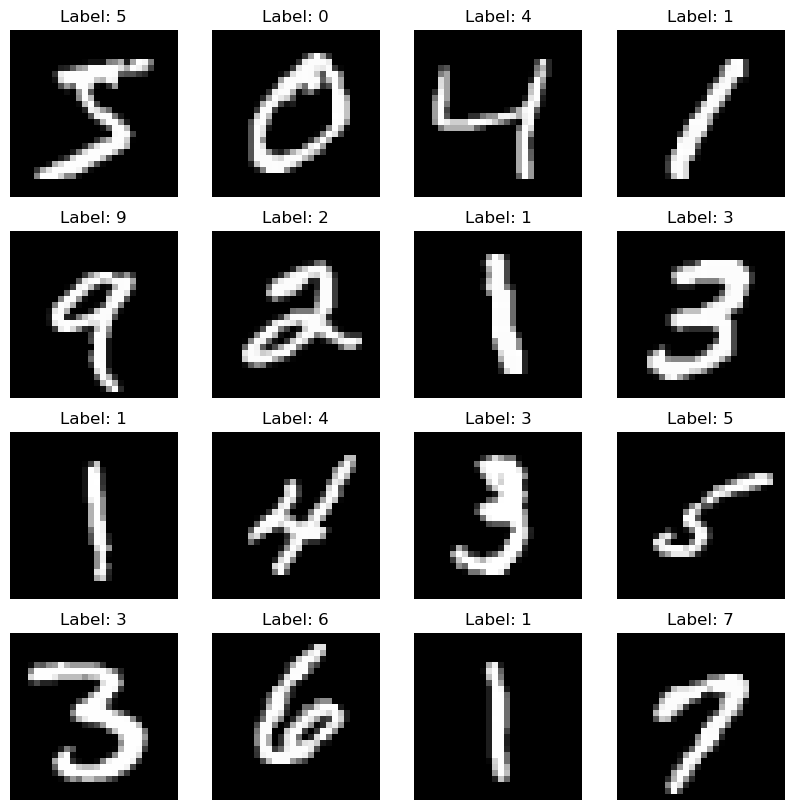

In [18]:
# Visualize the first few training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {Y_train[i]}')
    plt.axis('off')
plt.show()


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (0-9)
])


C:\Users\ashut\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
# Reshapeing the data to include the channel dimension (28x28x1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Train the model
mdl = model.fit(X_train, Y_train, epochs=10,validation_data=(X_test, Y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.8859 - loss: 0.3459 - val_accuracy: 0.9838 - val_loss: 0.0491
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9846 - loss: 0.0475 - val_accuracy: 0.9890 - val_loss: 0.0314
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9884 - val_loss: 0.0349
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.9889 - val_loss: 0.0368
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9920 - val_loss: 0.0266
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9900 - val_loss: 0.0347
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9934 - val_loss: 0.0257
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9969 -

In [19]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 2s - 8ms/step - accuracy: 0.9908 - loss: 0.0345
Test accuracy: 0.9908


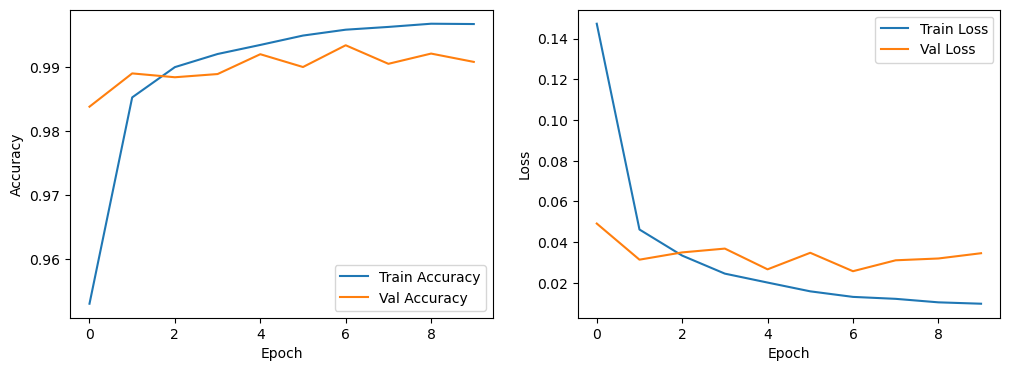

In [20]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [27]:
# Predict the label for a test image
predictions = model.predict(X_test)
i=0
predicted_label = np.argmax(predictions[i])

print(f'Predicted Label: {predicted_label}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted Label: 7


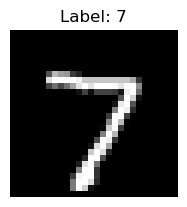

Predicted Label: 7


In [30]:

plt.figure(figsize=(10, 10))
plt.subplot(4, 4, i+1)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'Label: {Y_test[i]}')
plt.axis('off')
plt.show()
print(f'Predicted Label: {predicted_label}')